# Лабораторна робота №2
## студентки групи МІТ-31
## Шмат Катерини Сергіївни
## Вторая часть

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from random import randrange
from random import randint
from random import uniform

In [2]:
sex = {0:'Male', 1:'Female'}
smoker = {0:'No', 1:'Yes'}
day = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'}
time = {0:'Dinner', 1:'Lunch'}
data = []
for i in range(0, 244):
    row = []
    row.append(round(uniform(1, 50), 2))
    row.append(round(uniform(1, 10), 2))
    row.append(sex[randint(0, 1)])
    row.append(smoker[randint(0, 1)])
    row.append(day[randint(0, 6)])
    row.append(time[randint(0, 1)])
    row.append(randrange(1, 6))
    data.append(row)
df = pd.DataFrame(data, columns=['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'])


In [3]:
df.replace({'Male': 0, 'Female':1, 'No': 0, 'Yes':1, 'Dinner':0, 'Lunch':1, 'Mon':0, 'Tue':1, 'Wed':2, 'Thur':3, 'Fri':4, 'Sat':5, 'Sun':6}, None, True)

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,25.21,7.13,0,1,6,1,3
1,41.90,7.52,1,1,3,1,2
2,40.58,6.26,0,0,1,0,5
3,29.68,6.13,1,0,5,0,5
4,19.86,4.03,1,0,1,1,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int64  
 3   smoker      244 non-null    int64  
 4   day         244 non-null    int64  
 5   time        244 non-null    int64  
 6   size        244 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 13.5 KB


In [6]:
df.describe()

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,26.177049,5.442705,0.422131,0.508197,3.020492,0.495902,3.004098
std,14.662212,2.624437,0.494914,0.500960,2.081565,0.501011,1.458614
min,1.160000,1.050000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,14.397500,3.140000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,26.140000,5.370000,0.000000,1.000000,3.000000,0.000000,3.000000
75%,39.320000,7.665000,1.000000,1.000000,5.000000,1.000000,4.000000
max,49.810000,9.990000,1.000000,1.000000,6.000000,1.000000,5.000000


In [7]:
corr = df.corr()

<AxesSubplot:>

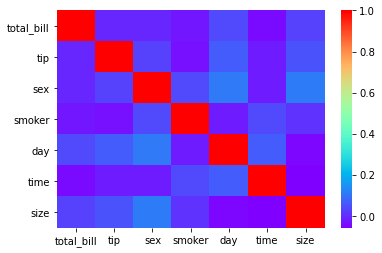

In [8]:
sns.heatmap(corr, cmap="rainbow")

In [9]:
import sklearn
from sklearn.model_selection import train_test_split

In [10]:
columns=df.columns
columns=columns[:2]
X=df[['total_bill', 'tip', 'sex', 'smoker', 'day', 'time']]

y=df[['size']]

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [12]:
 from sklearn.linear_model import LinearRegression

In [13]:
 lr = LinearRegression()

In [14]:
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
y_Hat = lr.predict(X_test)

In [16]:
 from sklearn.metrics import mean_absolute_error

In [17]:
mean_absolute_error(y_test, y_Hat)

1.4498318689455807

In [18]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test, y_Hat)

2.550402752338619

In [19]:
res = pd.DataFrame(y_test)
res['size_predicted'] = y_Hat

res.head()

,size,size_predicted
173,2,2.755270
105,1,2.988474
167,5,3.389887
109,2,3.292535
21,4,3.315422


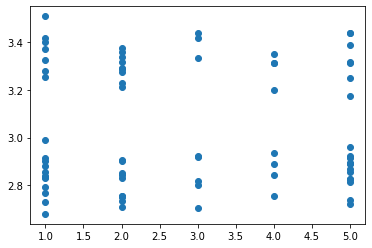

In [20]:
plt.scatter(res['size'],res['size_predicted'])